In [1]:
import os
import pandas as pd
pwd=os.getcwd()
print(pwd)

C:\Users\veera


In [2]:
df=pd.read_csv('german_credit_data (1).csv') # named dataset

In [3]:
df.head()

,Sl.No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
df

,Sl.No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Removal of NANs

In [6]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl.No             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna(value = 'NA')

In [9]:
df

,Sl.No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl.No             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
print(df['Saving accounts'].value_counts())

Saving accounts
little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


In [12]:
df['Checking account'] = df['Checking account'].fillna(value = 'NA')

In [13]:
df['Checking account'].value_counts()

Checking account
NA          394
little      274
moderate    269
rich         63
Name: count, dtype: int64

# Exploratory Data analysis

# unvariant analysis

<Axes: xlabel='Sex', ylabel='count'>

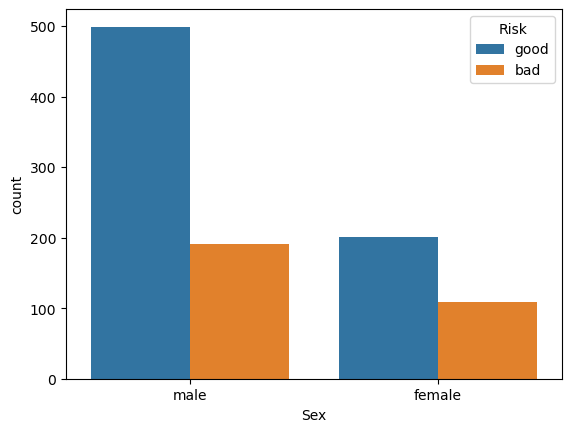

In [14]:
sns.countplot(x= 'Sex', data = df, hue= 'Risk')

<Axes: xlabel='Job', ylabel='count'>

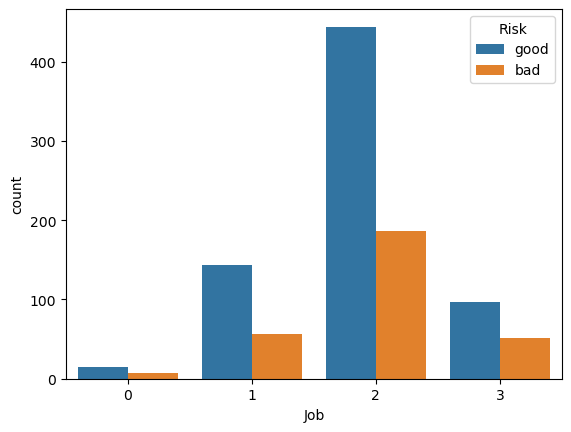

In [15]:
sns.countplot(x= 'Job', data = df, hue= 'Risk')

<Axes: xlabel='Housing', ylabel='count'>

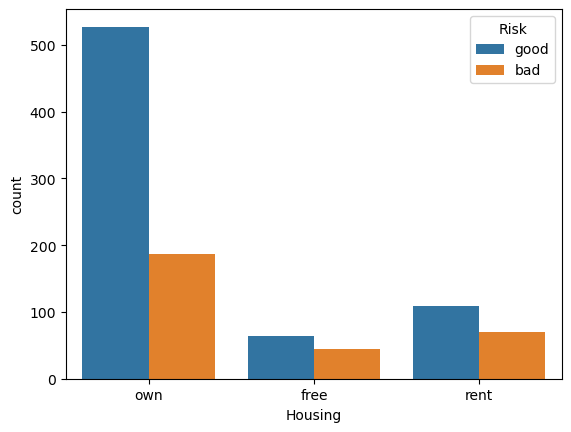

In [16]:
sns.countplot(x= 'Housing', data = df, hue= 'Risk')

<Axes: xlabel='Saving accounts', ylabel='count'>

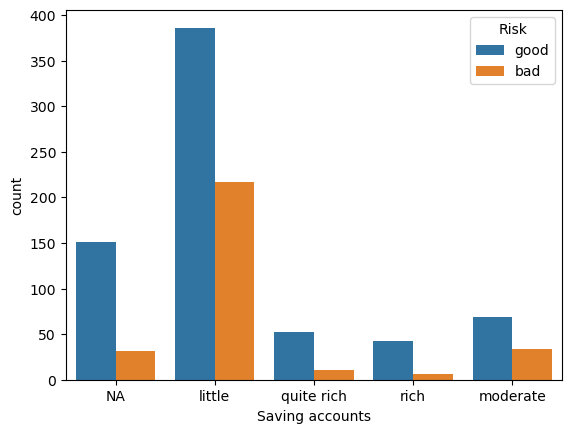

In [17]:
sns.countplot(x= 'Saving accounts', data = df, hue= 'Risk')

<Axes: xlabel='Checking account', ylabel='count'>

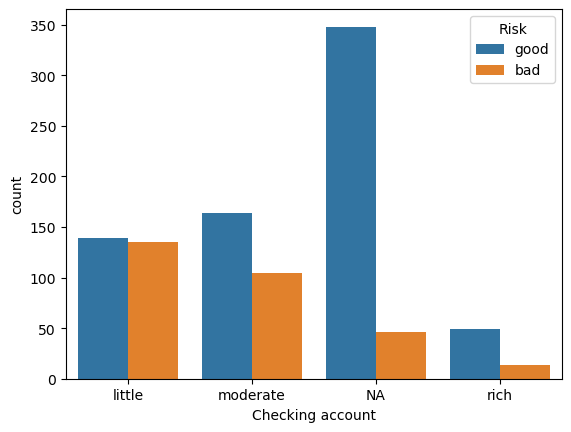

In [18]:
sns.countplot(x= 'Checking account', data = df, hue= 'Risk')

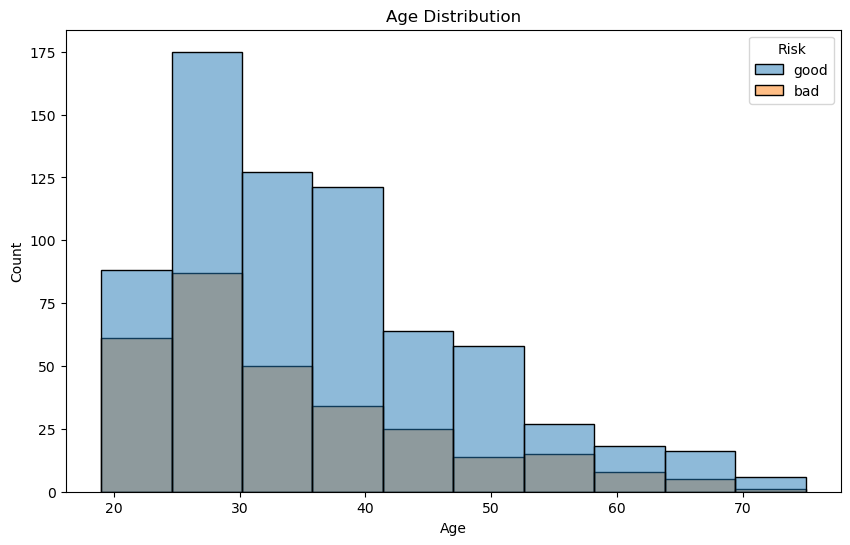

In [19]:
# Bar plot for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, hue='Risk')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

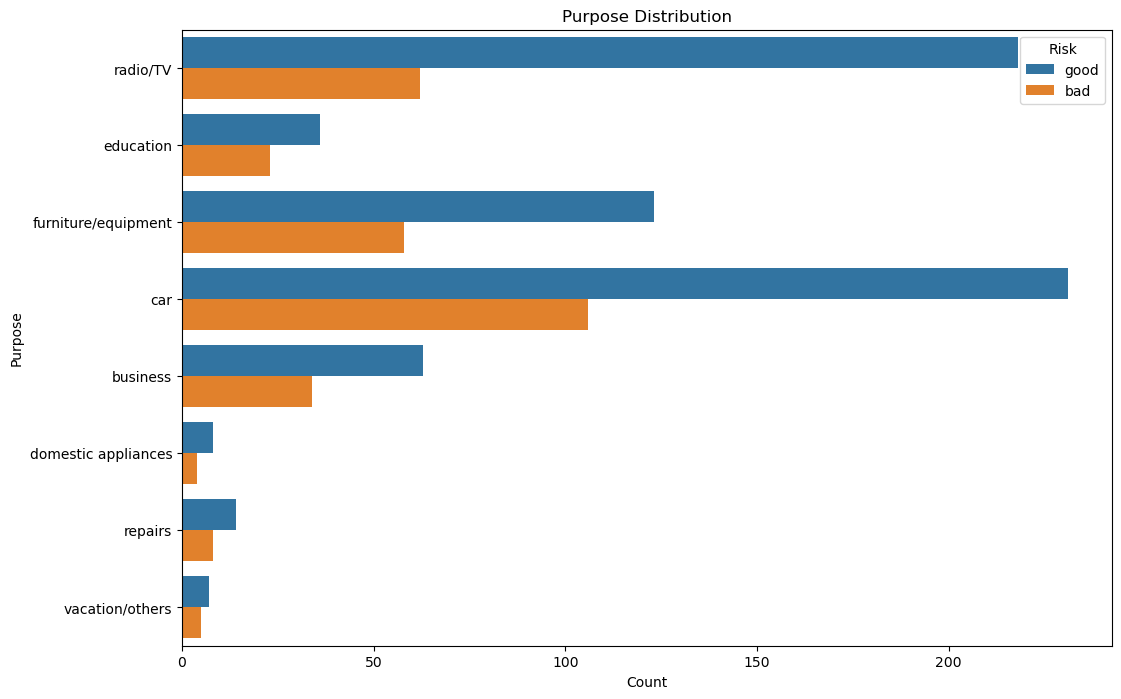

In [20]:
# Count plot for Purpose distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Purpose',hue='Risk')
plt.title('Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

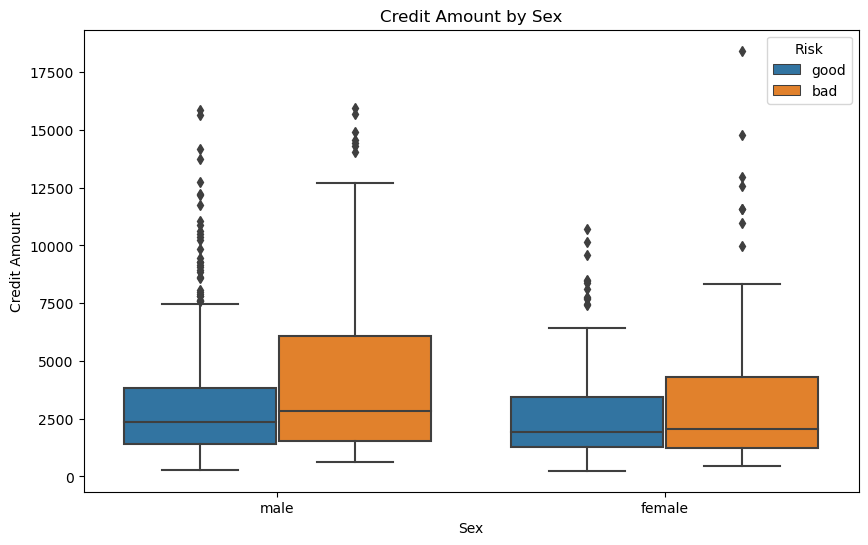

In [21]:
# Box plot for Credit amount by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sex', y='Credit amount',hue='Risk')
plt.title('Credit Amount by Sex')
plt.xlabel('Sex')
plt.ylabel('Credit Amount')
plt.show()

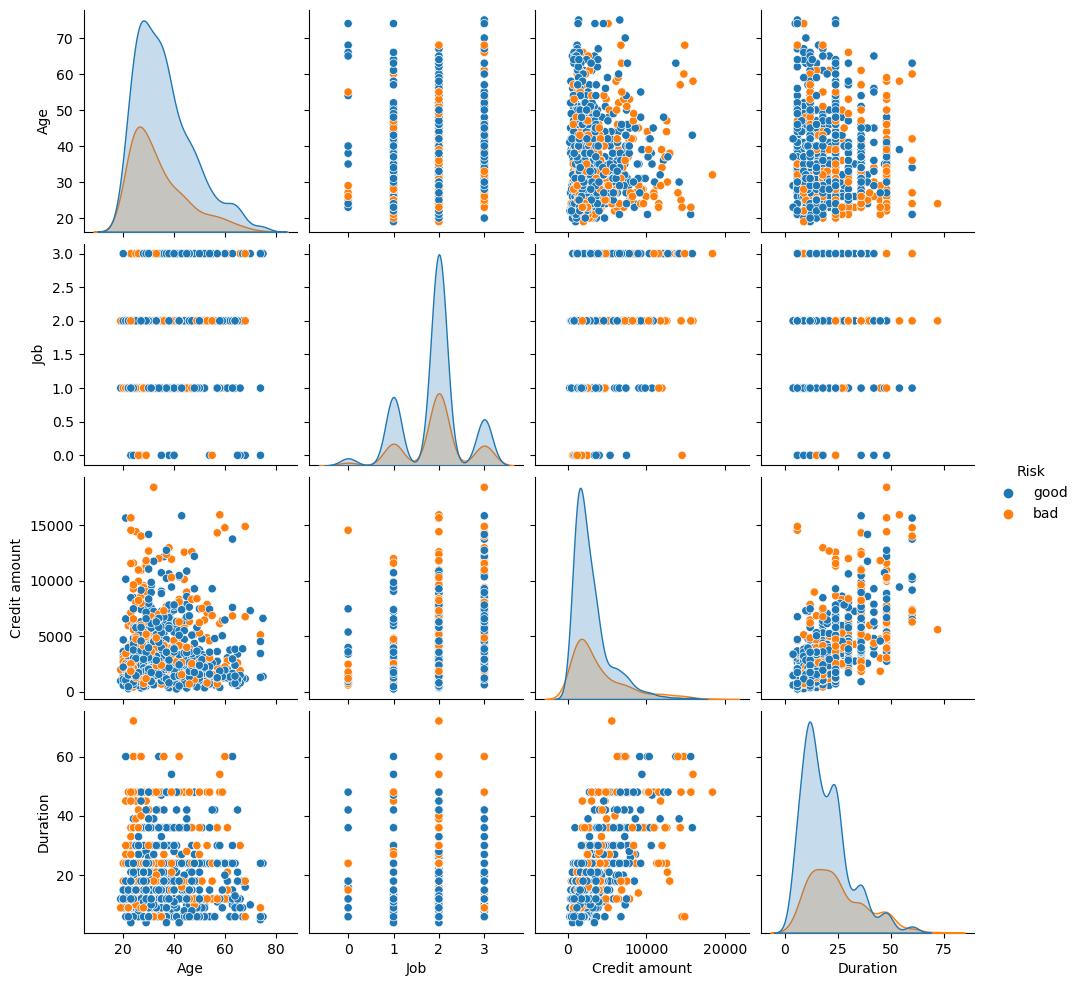

In [22]:
# Pairplot for exploring relationships between numerical variables with 'Risk' as hues
sns.pairplot(df[['Age', 'Job', 'Credit amount', 'Duration', 'Risk']], hue='Risk')
plt.show()

# Proportion of Savings Account with little or moderate income and their default level

In [23]:
print("\nLittle Income :\n",df[df['Saving accounts'] == 'little']['Risk'].value_counts().to_frame())
print("\nModerate Income\n", df[df['Saving accounts'] == 'moderate']['Risk'].value_counts().to_frame())


Little Income :
       count
Risk       
good    386
bad     217

Moderate Income
       count
Risk       
good     69
bad      34


In [24]:
print("\nLittle Income :\n",df[df['Checking account'] == 'little']['Risk'].value_counts().to_frame())
print("\nModerate Income\n", df[df['Checking account'] == 'moderate']['Risk'].value_counts().to_frame())


Little Income :
       count
Risk       
good    139
bad     135

Moderate Income
       count
Risk       
good    164
bad     105


In [25]:
df['Saving accounts']= df['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [26]:
df

,Sl.No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,other,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NA,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NA,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NA,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [27]:
df['Saving accounts'].value_counts()

Saving accounts
little      603
other       294
moderate    103
Name: count, dtype: int64

In [28]:
# 'Checking Account'
df['Checking account']= df['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [29]:
## LabeEncoding the Purpose column
le = LabelEncoder()
df['Purpose'] = le.fit_transform(df['Purpose'])

In [30]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", df['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


# Data Processing and  Data Preparation
 Assigning 'Dependent' and 'Independent' Features

In [31]:
df['Risk'] = df['Risk'].map({'good':0, 'bad': 1})

In [32]:
df['Risk'].value_counts()

Risk
0    700
1    300
Name: count, dtype: int64

In [33]:
df

,Sl.No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,other,little,1169,6,5,0
1,1,22,female,2,own,little,moderate,5951,48,5,1
2,2,49,male,1,own,little,other,2096,12,3,0
3,3,45,male,2,free,little,little,7882,42,4,0
4,4,53,male,2,free,little,little,4870,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,other,1736,12,4,0
996,996,40,male,3,own,little,little,3857,30,1,0
997,997,38,male,2,own,little,other,804,12,5,0
998,998,23,male,2,free,little,little,1845,45,5,1


# Upsampling Minority

In [34]:
from sklearn.utils import resample

In [35]:
credit_majority = df[df.Risk == 0]
credit_minority = df[df.Risk == 1]

In [36]:
credit_minority_upsampled = resample(credit_minority, replace = True, n_samples =  600, random_state = 666)

## Combine classes

credit_upscaled = pd.concat([credit_majority, credit_minority_upsampled])

In [37]:
credit_upscaled.Risk.value_counts()

Risk
0    700
1    600
Name: count, dtype: int64

In [38]:
x= credit_upscaled[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']]
y = credit_upscaled['Risk']

In [39]:
# Creating a copy to avoid corruption of Data.
x1 = x.copy()

In [40]:
# Data Stadardization: Dummification of Categorical Columns and Normalization of Numerical Columns

In [41]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ", cat_cols)

# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes != 'object'])
print("\nNumerical Columns:", num_cols)

## One-Hot Encoding Categorical Columns
x1_dummy = pd.get_dummies(x1[cat_cols], drop_first=True)

## Resetting the index of x1_dummy
x1_dummy.reset_index(drop=True, inplace=True)

## Resetting the index of x1
x1.reset_index(drop=True, inplace=True)

## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']

Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


In [42]:
SEED = 666

In [43]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = SEED)

In [44]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = SEED)

In [45]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )

train: 0.85% | Validation: 0.08% | Test: 0.08%


In [46]:
# Model Comparison

In [47]:
from sklearn.model_selection import KFold

# List of models
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SGD', SGDClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('RF', RandomForestClassifier()),
    ('Ada', AdaBoostClassifier()),
    ('Grad', GradientBoostingClassifier())
]

# Model Evaluation
result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']
#SEED = 42  # Set your desired random seed

for model_name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (
        model_name, cv_results1.mean(), cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.714545, RECALL=(0.710623), PRECISION=(0.684458), ROC-AUC=(0.780779)
KNN:
 ACCURACY = 0.730000, RECALL=(0.732385), PRECISION=(0.698298), ROC-AUC=(0.796081)
SGD:
 ACCURACY = 0.671818, RECALL=(0.616761), PRECISION=(0.651453), ROC-AUC=(0.697266)
DT:
 ACCURACY = 0.826364, RECALL=(0.882421), PRECISION=(0.768785), ROC-AUC=(0.828859)
SVC:
 ACCURACY = 0.746364, RECALL=(0.772504), PRECISION=(0.705492), ROC-AUC=(0.824929)
RF:
 ACCURACY = 0.864545, RECALL=(0.916354), PRECISION=(0.824024), ROC-AUC=(0.946485)
Ada:
 ACCURACY = 0.736364, RECALL=(0.740961), PRECISION=(0.709372), ROC-AUC=(0.813020)
Grad:
 ACCURACY = 0.796364, RECALL=(0.806449), PRECISION=(0.769135), ROC-AUC=(0.870080)


# Model Selection: Logistic Regression

In [48]:
lr = LogisticRegression()

model = lr.fit(x_train, y_train)

model.score(x_val, y_val)

0.76

In [49]:
# Fitting the model using the intermediate dataset.
model2 = lr.fit(x_int, y_int)

model2.score(x_test, y_test)

0.82

In [50]:
# Predcited probability of each class.
y_pred_prob = model2.predict_proba(x_test)

# Predicted value of each class
y_pred = model2.predict(x_test)

In [51]:
cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[41 13]
 [ 5 41]]
Transactions which were falsely classified as FRAUD =  13.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 5.0 Percent
Transactions which were truly classified as FRAUD = 41.0 Percent
Transactions which were truly classified as NOT-FRAUD = 41.0 Percent


# Model Optimization

# Regularization

In [52]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({ 'LogReg__penalty': ['l1'],'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['liblinear','saga']})

GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')

In [53]:
GSLR1.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(random_state=666))]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5, 10],
                         'LogReg__penalty': ['l1'],
                         'LogReg__solver': ['liblinear', 'saga'],
                         'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0]},
             scoring='accuracy')

In [54]:

GSLR1.score(x_val, y_val)

0.75

In [55]:
# Fetching the best parameters for Model building
GSLR1.best_params_

{'LogReg__C': 0.5,
 'LogReg__penalty': 'l1',
 'LogReg__solver': 'saga',
 'LogReg__tol': 0.1}

In [56]:
# Fitting the model using the intermediate dataset.
GSLR1.fit(x_int,y_int)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(random_state=666))]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5, 10],
                         'LogReg__penalty': ['l1'],
                         'LogReg__solver': ['liblinear', 'saga'],
                         'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0]},
             scoring='accuracy')

In [57]:
# Model Accuracy on the Test Set

GSLR1.score(x_test, y_test)

0.8

In [58]:
# Predcited probability of each class.
y_pred_prob1 = GSLR1.predict_proba(x_test)

# Predicted value of each class
y_pred1 = GSLR1.predict(x_test)

In [59]:
cMatrix1 = confusion_matrix(y_test, y_pred1)
print(cMatrix1)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix1[0][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix1[1][0]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix1[1][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix1[0][0]/ sum(sum(cMatrix1))*100 ))

[[41 13]
 [ 7 39]]
Transactions which were falsely classified as FRAUD =  13.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 7.0 Percent
Transactions which were truly classified as FRAUD = 39.0 Percent
Transactions which were truly classified as NOT-FRAUD = 41.0 Percent


# 'l2' Regularization

In [60]:
LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({'LogReg__max_iter':[100,200,300,400,500] ,'LogReg__penalty': ['l2'],'LogReg__C': [0.01,0.1,0.5,0.9,1,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['newton-cg','sag','lbfgs']})

GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')

In [61]:
GSLR2.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(random_state=666))]),
             param_grid={'LogReg__C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'LogReg__max_iter': [100, 200, 300, 400, 500],
                         'LogReg__penalty': ['l2'],
                         'LogReg__solver': ['newton-cg', 'sag', 'lbfgs'],
                         'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0]},
             scoring='accuracy')

In [62]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 0.1,
 'LogReg__max_iter': 100,
 'LogReg__penalty': 'l2',
 'LogReg__solver': 'newton-cg',
 'LogReg__tol': 0.01}

In [63]:
# Fitting the model using the intermediate dataset.
GSLR2.fit(x_int,y_int)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(random_state=666))]),
             param_grid={'LogReg__C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'LogReg__max_iter': [100, 200, 300, 400, 500],
                         'LogReg__penalty': ['l2'],
                         'LogReg__solver': ['newton-cg', 'sag', 'lbfgs'],
                         'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0]},
             scoring='accuracy')

In [64]:
# Model Accuracy on the Test Set

GSLR2.score(x_test, y_test)

0.81

In [65]:
# Predcited probability of each class.
y_pred_prob2 = GSLR2.predict_proba(x_test)

# Predicted value of each class
y_pred2 = GSLR2.predict(x_test)

In [66]:
cMatrix2 = confusion_matrix(y_test, y_pred2)
print(cMatrix2)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

[[42 12]
 [ 7 39]]
Transactions which were falsely classified as FRAUD =  12.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 7.0 Percent
Transactions which were truly classified as FRAUD = 39.0 Percent
Transactions which were truly classified as NOT-FRAUD = 42.0 Percent


# Model Evaluation

In [67]:
# Vaues taken from section 5.4.1
finalModel = LogisticRegression(penalty='l1', solver='liblinear', tol=0.1, C=5)

In [68]:
finalModel.fit(x_int, y_int)

LogisticRegression(C=5, penalty='l1', solver='liblinear', tol=0.1)

In [69]:
scoreTrain = finalModel.score(x_val, y_val)
scoreTest = finalModel.score(x_test,y_test)

print("The Accuracy of the model on the Train Set is: %.1f " % (scoreTrain * 100))
print("The Accuracy of the model on the Test Set is: %.1f " % (scoreTest * 100))

The Accuracy of the model on the Train Set is: 77.0 
The Accuracy of the model on the Test Set is: 80.0 


In [70]:
# Predcited probability of each class.
y_pred_prob_final = finalModel.predict_proba(x_test)

# Predicted value of each class
y_pred_final = finalModel.predict(x_test)

# Predicted Probability of class '0' i.e., not a Fraud Transaction.
y_zero = pd.Series(y_pred_prob_final[:,0])

# Mapping the predicted probability higher than 0.689 to class 0 i.e., Not-Fraud class.
y_pred_optimum = y_zero.map(lambda x: 0 if x>0.689 else 1)

cMatrix = confusion_matrix(y_test, y_pred_optimum)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[32 22]
 [ 3 43]]
Transactions which were falsely classified as FRAUD =  22.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 3.0 Percent
Transactions which were truly classified as FRAUD = 43.0 Percent
Transactions which were truly classified as NOT-FRAUD = 32.0 Percent


# Conclusion:
The current model has an accuracy of 78% on unseen data.
The Model makes a trade-off i.e., in order to reduce False-Negative, the False-Positive prediction rate increases.